In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
from keras.preprocessing.text import Tokenizer

In [41]:
from keras.utils.data_utils import pad_sequences

In [42]:
from keras.models import Sequential

In [43]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from keras.utils.np_utils import to_categorical

In [46]:
import pandas as pd

In [47]:
import numpy as np

In [48]:
import matplotlib.pyplot as plt

In [49]:
fb = pd.read_csv('D:\\Dissertation\\fb_sentiment_1.csv')

In [50]:
fb.head()

,Unnamed: 0,FBPost,Label
0,0,Drug Runners and a U.S. Senator have somethin...,O
1,1,"Heres a single, to add, to Kindle. Just read t...",O
2,2,If you tire of Non-Fiction.. Check out http://...,O
3,3,Ghost of Round Island is supposedly nonfiction.,O
4,4,Why is Barnes and Nobles version of the Kindle...,N


In [51]:
# Exploring Data lower-casing the coloumn names
fb.columns = map(str.lower, fb.columns)

In [52]:
# checkin the shape of the DF
fb.shape

(1018, 3)

In [53]:
import re

def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub('[^a-zA-z0-9\s]','',text)
    return text

fb['fbpost'] = fb['fbpost'].apply(preprocess_text)

In [54]:
fb = fb[fb.label != "O"]

In [55]:
# drop null values
fb.dropna(subset=['fbpost'], inplace=True)

# lowercase the text and remove symbols using regex
fb['fbpost'] = fb['fbpost'].apply(lambda x: x.lower())
fb['fbpost'] = fb['fbpost'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

# tokenize the text data
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(fb['fbpost'].values)
X = tokenizer.texts_to_sequences(fb['fbpost'].values)


In [56]:
X = pad_sequences(X)

In [57]:
#Preparing the labels
fb.label.value_counts()

P    641
N     95
Name: label, dtype: int64

In [58]:
Y = pd.get_dummies(fb['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(493, 203) (493, 2)
(243, 203) (243, 2)


In [59]:
#LSTM Model
embed_dim = 256
lstm_out = 256

In [60]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.layers import SimpleRNN, Dense

In [61]:
model = Sequential()

In [64]:
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 203, 256)          512000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 203, 256)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 2)                 514       
                                                                 
 embedding_1 (Embedding)     (None, 2, 256)            512000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 2, 256)           0         
 lDropout1D)                                            

In [65]:
# training the model
batch_size = 32
hist = model.fit(X_train, Y_train, epochs = 40, batch_size=batch_size, verbose = 2)

Epoch 1/40
16/16 - 12s - loss: 0.5127 - accuracy: 0.8256 - 12s/epoch - 780ms/step
Epoch 2/40
16/16 - 8s - loss: 0.4254 - accuracy: 0.8621 - 8s/epoch - 512ms/step
Epoch 3/40
16/16 - 8s - loss: 0.4053 - accuracy: 0.8621 - 8s/epoch - 502ms/step
Epoch 4/40
16/16 - 9s - loss: 0.4067 - accuracy: 0.8621 - 9s/epoch - 582ms/step
Epoch 5/40
16/16 - 7s - loss: 0.4014 - accuracy: 0.8621 - 7s/epoch - 463ms/step
Epoch 6/40
16/16 - 8s - loss: 0.4033 - accuracy: 0.8621 - 8s/epoch - 491ms/step
Epoch 7/40
16/16 - 7s - loss: 0.4024 - accuracy: 0.8621 - 7s/epoch - 440ms/step
Epoch 8/40
16/16 - 7s - loss: 0.4054 - accuracy: 0.8621 - 7s/epoch - 434ms/step
Epoch 9/40
16/16 - 7s - loss: 0.4004 - accuracy: 0.8621 - 7s/epoch - 427ms/step
Epoch 10/40
16/16 - 8s - loss: 0.4057 - accuracy: 0.8621 - 8s/epoch - 477ms/step
Epoch 11/40
16/16 - 7s - loss: 0.4068 - accuracy: 0.8621 - 7s/epoch - 410ms/step
Epoch 12/40
16/16 - 7s - loss: 0.4035 - accuracy: 0.8621 - 7s/epoch - 416ms/step
Epoch 13/40
16/16 - 7s - loss: 0.40

In [66]:
#Plotting a histogram over the 20 epocs and plotting the accuracy and loss
history = pd.DataFrame(hist.history)

In [67]:
plt.figure(figsize=(10,10));

<Figure size 720x720 with 0 Axes>

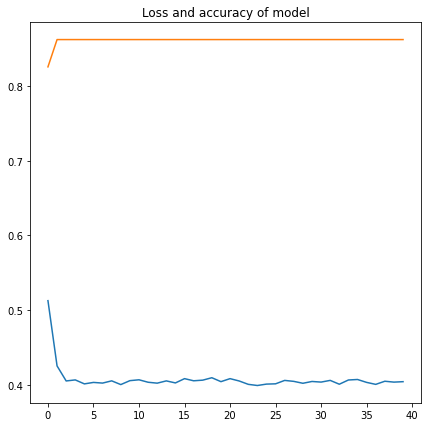

In [69]:
history = pd.DataFrame(hist.history)
plt.figure(figsize=(7,7));
plt.plot(history["loss"]);
plt.plot(history["accuracy"]);
plt.title("Loss and accuracy of model");
plt.show();

In [70]:
#Testing the model, and retrieveing score and accuracy:
score,acc = model.evaluate(X_test,Y_test)
print("score: %.2f" % (score))
print("accuracy: %.2f" % (acc))

8/8 [==============================] - 3s 301ms/step - loss: 0.3500 - accuracy: 0.8889
score: 0.35
accuracy: 0.89


In [71]:
#now we validate for the models accuracy in predicting either a positive, or a negative score:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
x_test = X_test[:-validation_size]
y_test = Y_test[:-validation_size]

In [72]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    result = model.predict(X_validate[x].reshape(1,x_test.shape[1]),verbose = 2)[0]
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1
print("positive_acc", pos_correct/pos_cnt*100, "%")
print("negative_acc", neg_correct/neg_cnt*100, "%")

1/1 - 1s - 704ms/epoch - 704ms/step
1/1 - 0s - 166ms/epoch - 166ms/step
1/1 - 0s - 260ms/epoch - 260ms/step
1/1 - 0s - 136ms/epoch - 136ms/step
1/1 - 0s - 139ms/epoch - 139ms/step
1/1 - 0s - 200ms/epoch - 200ms/step
1/1 - 0s - 185ms/epoch - 185ms/step
1/1 - 0s - 143ms/epoch - 143ms/step
1/1 - 0s - 148ms/epoch - 148ms/step
1/1 - 0s - 136ms/epoch - 136ms/step
1/1 - 0s - 134ms/epoch - 134ms/step
1/1 - 0s - 146ms/epoch - 146ms/step
1/1 - 0s - 133ms/epoch - 133ms/step
1/1 - 0s - 157ms/epoch - 157ms/step
1/1 - 0s - 140ms/epoch - 140ms/step
1/1 - 0s - 140ms/epoch - 140ms/step
1/1 - 0s - 150ms/epoch - 150ms/step
1/1 - 0s - 145ms/epoch - 145ms/step
1/1 - 0s - 201ms/epoch - 201ms/step
1/1 - 0s - 223ms/epoch - 223ms/step
1/1 - 0s - 164ms/epoch - 164ms/step
1/1 - 0s - 220ms/epoch - 220ms/step
1/1 - 0s - 141ms/epoch - 141ms/step
1/1 - 0s - 150ms/epoch - 150ms/step
1/1 - 0s - 139ms/epoch - 139ms/step
1/1 - 0s - 145ms/epoch - 145ms/step
1/1 - 0s - 240ms/epoch - 240ms/step
1/1 - 0s - 142ms/epoch - 142

In [73]:
#now testing  on a random sample from the Facebook comments on Kindle's page:
cmnt = ['your service is worst']
#vectorizing the comment
cmnt = tokenizer.texts_to_sequences(cmnt)
cmnt = pad_sequences(cmnt, maxlen=203, dtype='int32', value=0)
print(cmnt)
sentiment = model.predict(cmnt,batch_size=2,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  53 683  12 754]]
1/1 - 0s - 163ms/epoch - 163ms/step
positive


In [74]:
# #now testing  on a random sample from the Facebook comments
cmnt = ['Why is the newer version of the iphone so much more expensive than the earlier iPhone?']
cmnt = tokenizer.texts_to_sequences(cmnt)
cmnt = pad_sequences(cmnt, maxlen=203, dtype='int32', value=0)

# Predict sentiment
sentiment = model.predict(cmnt, batch_size=2, verbose=2)[0]
predicted_sentiment = np.argmax(sentiment)

# Define sentiment classes
sentiment_classes = {0: "negative", 1: "positive"}

# Print predicted sentiment
if predicted_sentiment in sentiment_classes:
    print(sentiment_classes[predicted_sentiment])
else:
    print("Unknown sentiment")

1/1 - 0s - 136ms/epoch - 136ms/step
positive


In [37]:
#now testing  on a random sample from the Facebook comments on Kindle's page:
cmnt = ['your service is bad']
#vectorizing the comment
cmnt = tokenizer.texts_to_sequences(cmnt)
cmnt = pad_sequences(cmnt, maxlen=203, dtype='int32', value=0)
print(cmnt)
sentiment = model.predict(cmnt,batch_size=2,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  53 683  12 289]]
1/1 - 0s - 153ms/epoch - 153ms/step
negative


In [75]:
#now testing  on a random sample from the Facebook comments on Kindle's page:
cmnt = ['your service has problems']
#vectorizing the comment
cmnt = tokenizer.texts_to_sequences(cmnt)
cmnt = pad_sequences(cmnt, maxlen=203, dtype='int32', value=0)
print(cmnt)
sentiment = model.predict(cmnt,batch_size=2,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

In [76]:
#now testing  on a random sample from the Facebook comments on Kindle's page:
cmnt = ['your service is good']
#vectorizing the comment
cmnt = tokenizer.texts_to_sequences(cmnt)
cmnt = pad_sequences(cmnt, maxlen=203, dtype='int32', value=0)
print(cmnt)
sentiment = model.predict(cmnt,batch_size=2,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  53 683  12 117]]
1/1 - 0s - 161ms/epoch - 161ms/step
positive


Accuracy: 0.6911764705882353
Precision: 0.7168067226890756
Recall: 0.6911764705882353
F1 Score: 0.6598121729578211


Text(33.0, 0.5, 'True Labels')

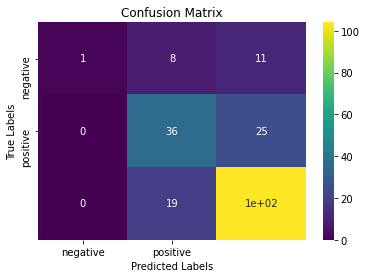

In [35]:
#SVM

import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv('D:\\Dissertation\\fb_sentiment_2.csv')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

# Remove rows with NaN values from X_train and y_train
X_train = X_train.dropna()
y_train = y_train.dropna()

# Fit the vectorizer to the training data and transform both the training and testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Train an SVM classifier on the TF-IDF transformed training data
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predict the sentiment for the testing data using the trained SVM classifier
y_pred = svm_model.predict(X_test_tfidf)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Plot the confusion matrix using heatmap
labels = ['negative', 'positive']
sns.heatmap(cm, annot=True, cmap='viridis', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')



In [108]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [119]:
#RNN

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('D:\\Dissertation\\fb_sentiment_2.csv')

# Drop the rows with missing values
df = df.dropna()

# Preprocess the text data
df['Text'] = df['Text'].astype(str) # convert the 'Text' column to string
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
X = pad_sequences(sequences, maxlen=50)


from sklearn.preprocessing import LabelEncoder

# Convert the sentiment values to numerical values
le = LabelEncoder()
y = le.fit_transform(df['Sentiment'])

# Split the data into training and test sets
split = int(0.8 * len(df))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32, input_length=50))
model.add(SimpleRNN(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
loss, acc = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}, Test accuracy: {acc:.3f}')




Epoch 1/20
11/11 [==============================] - 2s 47ms/step - loss: 0.0798 - acc: 0.2958 - val_loss: -0.8721 - val_acc: 0.2209
Epoch 2/20
11/11 [==============================] - 0s 20ms/step - loss: -0.8700 - acc: 0.3005 - val_loss: -1.3953 - val_acc: 0.2209
Epoch 3/20
11/11 [==============================] - 0s 20ms/step - loss: -1.2000 - acc: 0.3035 - val_loss: -1.6103 - val_acc: 0.2209
Epoch 4/20
11/11 [==============================] - 0s 19ms/step - loss: -1.4626 - acc: 0.3051 - val_loss: -1.8018 - val_acc: 0.2209
Epoch 5/20
11/11 [==============================] - 0s 19ms/step - loss: -1.6611 - acc: 0.3082 - val_loss: -2.1720 - val_acc: 0.2209
Epoch 6/20
11/11 [==============================] - 0s 19ms/step - loss: -1.8226 - acc: 0.3066 - val_loss: -2.3488 - val_acc: 0.2209
Epoch 7/20
11/11 [==============================] - 0s 20ms/step - loss: -2.0331 - acc: 0.3082 - val_loss: -2.6122 - val_acc: 0.2209
Epoch 8/20
11/11 [==============================] - 0s 22ms/step - los

Confusion Matrix:
[[  2   2  16]
 [  2  14  45]
 [  0   7 116]]
F1 Score: 0.5822875816993465
Accuracy: 0.6470588235294118
Precision: 0.6261794327163437
Recall: 0.6470588235294118


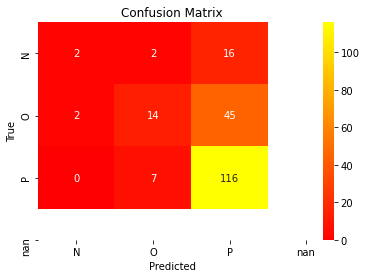

In [23]:
# Print the evaluation metrics
print('Confusion Matrix:')
print(confusion_mat)
print('F1 Score:', f1)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

# Create a heatmap of the confusion matrix
labels = sorted(data['Sentiment'].astype(str).unique())
heatmap = sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='autumn', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



Confusion Matrix:
[[  2   2  16]
 [  2  14  45]
 [  0   7 116]]
F1 Score: 0.5822875816993465
Accuracy: 0.6470588235294118
Precision: 0.6261794327163437
Recall: 0.6470588235294118


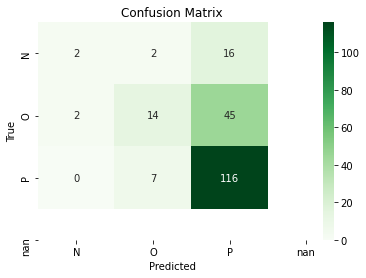

In [21]:
# Naive Bayes

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

# Load the dataset
data = pd.read_csv('D:\\Dissertation\\fb_sentiment_2.csv')

# Preprocess the data
data['Text'] = data['Text'].fillna('')  # Replace NaN values with empty string

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Sentiment'], test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text into a matrix of token counts
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Handle missing values in the target variable
y_train = y_train.fillna('')  # Replace NaN values with empty string

# Train a Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_counts, y_train)

# Make predictions on the testing data
y_pred = naive_bayes.predict(X_test_counts)

# Compute evaluation metrics
confusion_mat = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print('Confusion Matrix:')
print(confusion_mat)
print('F1 Score:', f1)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

# Create a heatmap of the confusion matrix
labels = sorted(data['Sentiment'].astype(str).unique())
heatmap = sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


No NaN values found in the target variable.
Confusion Matrix:
[[  0   3  17]
 [  0  30  31]
 [  0  10 113]]
F1 Score: 0.6523166146198457
Accuracy: 0.7009803921568627
Precision: 0.7298398631444489
Recall: 0.7009803921568627


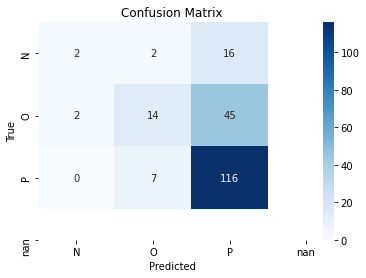

In [38]:
# Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.impute import SimpleImputer
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder



# Load the dataset
data = pd.read_csv('D:\\Dissertation\\fb_sentiment_2.csv')

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Handling missing values
data['Text'].fillna('', inplace=True)



# Split the data into training and testing sets
X = data['Text']
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Convert sparse matrix to dense array
X_train_vec = X_train_vec.toarray()
X_test_vec = X_test_vec.toarray()

    
# Check for NaN values in the target variable (y_train_encoded) and remove corresponding samples
nan_indices = np.isnan(y_train_encoded.astype(float))
if np.any(nan_indices):
    print("NaN values found in the target variable. Removing corresponding samples.")
    X_train_vec = X_train_vec[~nan_indices]
    y_train_encoded = y_train_encoded[~nan_indices]
else:
    print("No NaN values found in the target variable.")

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train_encoded)

# Handling missing values in the test set
imputer = SimpleImputer(strategy='mean')
X_test_vec = imputer.fit_transform(X_test_vec)

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Convert the predicted values to string labels
y_pred_labels = label_encoder.inverse_transform(y_pred)


# Compute evaluation metrics
confusion = confusion_matrix(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels, average='weighted')
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average='weighted',zero_division=1)
recall = recall_score(y_test, y_pred_labels, average='weighted')

# Print the evaluation metrics
print("Confusion Matrix:")
print(confusion)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Plot the confusion matrix as a heatmap

labels = sorted(data['Sentiment'].astype(str).unique())
heatmap = sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



Confusion Matrix:
[[  3   2  17]
 [  1  12  48]
 [  0   6 115]]
Confusion Matrix:
[[  3   2  17]
 [  1  12  48]
 [  0   6 115]]
F1 Score: 0.5667130829009533
Accuracy: 0.6372549019607843
Precision: 0.6392429193899781
Recall: 0.6372549019607843


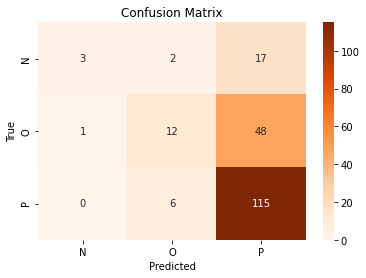

In [12]:
# KNN

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


# Load the dataset
data = pd.read_csv('D:\\Dissertation\\fb_sentiment_2.csv')

# Remove rows with missing values
data = data.dropna()

# Preprocess the data
X = data['Text']
y = data['Sentiment']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_vec)

# Compute evaluation metrics
#confusion = confusion_matrix(y_test, y_pred)
#f1 = classification_report(y_test, y_pred)
#accuracy = knn.score(X_test_vec, y_test)

# Print the evaluation metrics
print('Confusion Matrix:')
print(confusion)
#print('\nF1 Score:')
#print(f1)
#print('\nAccuracy:', accuracy)


# Compute evaluation metrics
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Create a heatmap of the confusion matrix
labels = sorted(data['Sentiment'].unique())
heatmap = sns.heatmap(confusion, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix:
[[  5   7  10]
 [  4  43  14]
 [  2  16 103]]

Precision: 0.7248837377948077
Recall: 0.7401960784313726
F1 Score: 0.7278520480243577
Accuracy: 0.7401960784313726


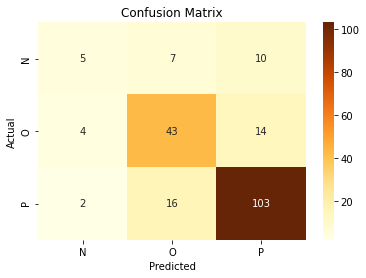

In [20]:
# XGBoost

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('D:\\Dissertation\\fb_sentiment_2.csv')

# Remove rows with missing values
data = data.dropna()

# Split the data into features (X) and target variable (y)
X = data['Text']
y = data['Sentiment']

# Convert categorical labels to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the XGBoost model
model = XGBClassifier()
model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Compute evaluation metrics
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion)
print()
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Create a heatmap of the confusion matrix
labels = sorted(data['Sentiment'].unique())
heatmap = sns.heatmap(confusion, annot=True, fmt='d', cmap='YlOrBr', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the dataset
data = pd.read_csv('D:\\Dissertation\\fb_sentiment_2.csv')

# Remove rows with missing values
data = data.dropna()

# Split the data into features (X) and target variable (y)
X = data['Text']
y = data['Sentiment']

# Convert string labels to numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
max_seq_length = max(len(sequence) for sequence in X_train_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_seq_length)

# Build the LSTM model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
hidden_units = 128
num_classes = len(label_encoder.classes_)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_seq_length))
model.add(LSTM(hidden_units, dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
model.fit(X_train_padded, y_train, epochs=10, batch_size=32)

# Make predictions on the test set
y_pred = model.predict_classes(X_test_padded)

# Convert numeric labels back to original string labels
y_test = label_encoder.inverse_transform(y_test)
y_pred = label_encoder.inverse_transform(y_pred)

# Compute evaluation metrics
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion)
print()
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Create a heatmap of the confusion matrix
labels = sorted(data['Sentiment'].unique())
heatmap = sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/10
26/26 [==============================] - 10s 269ms/step - loss: 0.9189 - accuracy: 0.6244
Epoch 2/10
26/26 [==============================] - 6s 218ms/step - loss: 0.7817 - accuracy: 0.6404
Epoch 3/10
26/26 [==============================] - 6s 227ms/step - loss: 0.5837 - accuracy: 0.7451
Epoch 4/10
26/26 [==============================] - 5s 188ms/step - loss: 0.3852 - accuracy: 0.8436
Epoch 5/10
26/26 [==============================] - 5s 186ms/step - loss: 0.3022 - accuracy: 0.8941
Epoch 6/10
26/26 [==============================] - 6s 219ms/step - loss: 0.1917 - accuracy: 0.9409
Epoch 7/10
26/26 [==============================] - 6s 217ms/step - loss: 0.1100 - accuracy: 0.9667
Epoch 8/10
26/26 [==============================] - 6s 213ms/step - loss: 0.0683 - accuracy: 0.9791
Epoch 9/10
26/26 [==============================] - 5s 190ms/step - loss: 0.0348 - accuracy: 0.9926
Epoch 10/10
26/26 [==============================] - 5s 186ms/step - loss: 0.0394 - accuracy: 0.987

AttributeError: 'Sequential' object has no attribute 'predict_classes'

Epoch 1/30
26/26 [==============================] - 9s 228ms/step - loss: 0.9206 - accuracy: 0.6256
Epoch 2/30
26/26 [==============================] - 6s 229ms/step - loss: 0.7883 - accuracy: 0.6404
Epoch 3/30
26/26 [==============================] - 6s 236ms/step - loss: 0.5934 - accuracy: 0.7377
Epoch 4/30
26/26 [==============================] - 6s 235ms/step - loss: 0.3712 - accuracy: 0.8670
Epoch 5/30
26/26 [==============================] - 6s 232ms/step - loss: 0.2353 - accuracy: 0.9384
Epoch 6/30
26/26 [==============================] - 6s 234ms/step - loss: 0.1535 - accuracy: 0.9569
Epoch 7/30
26/26 [==============================] - 6s 236ms/step - loss: 0.0997 - accuracy: 0.9741
Epoch 8/30
26/26 [==============================] - 6s 225ms/step - loss: 0.0563 - accuracy: 0.9815
Epoch 9/30
26/26 [==============================] - 6s 224ms/step - loss: 0.0324 - accuracy: 0.9926
Epoch 10/30
26/26 [==============================] - 6s 226ms/step - loss: 0.0403 - accuracy: 0.9926

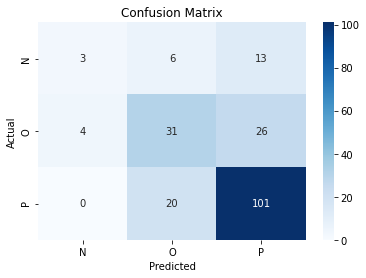

In [148]:
# LSTM Final

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the dataset
data = pd.read_csv('D:\\Dissertation\\fb_sentiment_2.csv')

# Remove rows with missing values
data = data.dropna()

# Split the data into features (X) and target variable (y)
X = data['Text']
y = data['Sentiment']

# Convert string labels to numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
max_seq_length = max(len(sequence) for sequence in X_train_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_seq_length)

# Build the LSTM model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
hidden_units = 128
num_classes = len(label_encoder.classes_)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_seq_length))
model.add(LSTM(hidden_units, dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
model.fit(X_train_padded, y_train, epochs=30, batch_size=32)

# Make predictions on the test set
y_pred_prob = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert numeric labels back to original string labels
y_test = label_encoder.inverse_transform(y_test)
y_pred = label_encoder.inverse_transform(y_pred)

# Compute evaluation metrics
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion)
print()
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Create a heatmap of the confusion matrix
labels = sorted(data['Sentiment'].unique())
heatmap = sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


